# Sentence sentiment prediction using three models

## Model performance comparisons



Some portions of the program adapted from coursera Sequence Modeling course emojify homework.
Change from previous version: use keras for both neural network models

In [54]:
!pwd

/Users/murataydogdu/Desktop/TextualAnalysis


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import shuffle
import csv
import time

%matplotlib inline

In [4]:
#df = pd.read_csv('data/test.CSV',index_col = 0)
#df = df[['R']]
#df

In [56]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('res_df.csv')
from IPython.display import display

pd.options.display.max_columns = None
display(df)

,A0P0,A0P1,A0P2,A1P0,A1P1,A1P2,A2P0,A2P1,A2P2,acc,f1_0,f1_1,f1_2,f1_all,model,prec_0,prec_1,prec_2,prec_all,rec_0,rec_1,rec_2,rec_all,rnd_ct,sup_0,sup_1,sup_2,sup_all,trtest
0,59,70,6,66,242,22,18,169,48,0.50,0.42,0.60,0.31,0.47,LM,0.41,0.50,0.63,0.53,0.44,0.73,0.20,0.50,1,135,330,235,700,TR
1,21,32,5,32,106,11,7,66,20,0.49,0.36,0.60,0.31,0.46,LM,0.35,0.52,0.56,0.50,0.36,0.71,0.22,0.49,1,58,149,93,300,TE
2,42,42,51,13,274,43,18,64,153,0.67,0.40,0.77,0.63,0.65,GV,0.58,0.72,0.62,0.66,0.31,0.83,0.65,0.67,1,135,330,235,700,TR
3,13,11,34,7,118,24,17,35,41,0.57,0.27,0.75,0.43,0.56,GV,0.35,0.72,0.41,0.55,0.22,0.79,0.44,0.57,1,58,149,93,300,TE
4,15,11,109,0,312,18,4,37,194,0.74,0.19,0.90,0.70,0.70,NN,0.79,0.87,0.60,0.76,0.11,0.95,0.83,0.74,1,135,330,235,700,TR
5,4,10,44,1,122,26,3,33,57,0.61,0.12,0.78,0.52,0.57,NN,0.50,0.74,0.45,0.60,0.07,0.82,0.61,0.61,1,58,149,93,300,TE
6,54,70,9,75,241,18,15,168,50,0.49,0.39,0.59,0.32,0.46,LM,0.38,0.50,0.65,0.53,0.41,0.72,0.21,0.49,2,133,334,233,700,TR
7,26,32,2,23,107,15,10,67,18,0.50,0.44,0.61,0.28,0.47,LM,0.44,0.52,0.51,0.50,0.43,0.74,0.19,0.50,2,60,145,95,300,TE
8,56,31,46,14,266,54,32,62,139,0.66,0.48,0.77,0.59,0.65,GV,0.55,0.74,0.58,0.65,0.42,0.80,0.60,0.66,2,133,334,233,700,TR
9,17,19,24,8,116,21,14,26,55,0.63,0.34,0.76,0.56,0.61,GV,0.44,0.72,0.55,0.61,0.28,0.80,0.58,0.63,2,60,145,95,300,TE


In [57]:
df1 = df[['model','trtest','acc']]
df1.groupby(['model','trtest']).describe()

acc                                   
              count mean  std  min  25%  50%  75%  max
model trtest                                          
GV    TE     100.00 0.60 0.02 0.52 0.58 0.60 0.61 0.65
      TR     100.00 0.66 0.01 0.63 0.65 0.66 0.67 0.70
LM    TE     100.00 0.50 0.03 0.44 0.48 0.50 0.52 0.56
      TR     100.00 0.49 0.01 0.47 0.49 0.49 0.50 0.52
NN    TE     100.00 0.59 0.03 0.50 0.58 0.60 0.61 0.67
      TR     100.00 0.74 0.04 0.61 0.72 0.74 0.76 0.82

In [68]:
# Confusion matrix
# Use test set only
# There are either 700 (training) or 300 (test) observations
# Divide each of the AxBy by that total to get percentages
df1 = df[['model','trtest','A0P0','A0P1','A0P2','A1P0',
          'A1P1','A1P2','A2P0','A2P1','A2P2',
          'sup_0','sup_1','sup_2','sup_all']].loc[df['trtest'] == 'TE']
# Note: A0 is really sup_0
df1 = df1.assign(pA0P0 = 1.0 * df1.A0P0 / df1.sup_all)
df1 = df1.assign(pA0P1 = 1.0 * df1.A0P1 / df1.sup_all)
df1 = df1.assign(pA0P2 = 1.0 * df1.A0P2 / df1.sup_all)
df1 = df1.assign(pA1P0 = 1.0 * df1.A1P0 / df1.sup_all)
df1 = df1.assign(pA1P1 = 1.0 * df1.A1P1 / df1.sup_all)
df1 = df1.assign(pA1P2 = 1.0 * df1.A1P2 / df1.sup_all)
df1 = df1.assign(pA2P0 = 1.0 * df1.A2P0 / df1.sup_all)
df1 = df1.assign(pA2P1 = 1.0 * df1.A2P1 / df1.sup_all)
df1 = df1.assign(pA2P2 = 1.0 * df1.A2P2 / df1.sup_all)


df1 = df1.assign(P0 = df1.A0P0 + df1.A1P0 + df1.A2P0)
df1 = df1.assign(A0 = df1.A0P0 + df1.A0P1 + df1.A0P2)
df1 = df1.assign(P1 = df1.A0P1 + df1.A1P1 + df1.A2P1)
df1 = df1.assign(A1 = df1.A1P0 + df1.A1P1 + df1.A1P2)
df1 = df1.assign(P2 = df1.A0P2 + df1.A1P2 + df1.A2P2)
df1 = df1.assign(A2 = df1.A2P0 + df1.A2P1 + df1.A2P2)

In [69]:
df1
#df2 = df1[['P0','model','trtest']]
#df2.groupby(['model','trtest']).describe()

,model,trtest,A0P0,A0P1,A0P2,A1P0,A1P1,A1P2,A2P0,A2P1,A2P2,sup_0,sup_1,sup_2,sup_all,pA0P0,pA0P1,pA0P2,pA1P0,pA1P1,pA1P2,pA2P0,pA2P1,pA2P2,P0,A0,P1,A1,P2,A2
1,LM,TE,21,32,5,32,106,11,7,66,20,58,149,93,300,0.07,0.11,0.02,0.11,0.35,0.04,0.02,0.22,0.07,60,58,204,149,36,93
3,GV,TE,13,11,34,7,118,24,17,35,41,58,149,93,300,0.04,0.04,0.11,0.02,0.39,0.08,0.06,0.12,0.14,37,58,164,149,99,93
5,NN,TE,4,10,44,1,122,26,3,33,57,58,149,93,300,0.01,0.03,0.15,0.00,0.41,0.09,0.01,0.11,0.19,8,58,165,149,127,93
7,LM,TE,26,32,2,23,107,15,10,67,18,60,145,95,300,0.09,0.11,0.01,0.08,0.36,0.05,0.03,0.22,0.06,59,60,206,145,35,95
9,GV,TE,17,19,24,8,116,21,14,26,55,60,145,95,300,0.06,0.06,0.08,0.03,0.39,0.07,0.05,0.09,0.18,39,60,161,145,100,95
11,NN,TE,8,13,39,2,114,29,7,27,61,60,145,95,300,0.03,0.04,0.13,0.01,0.38,0.10,0.02,0.09,0.20,17,60,154,145,129,95
13,LM,TE,28,28,5,26,111,4,10,71,17,61,141,98,300,0.09,0.09,0.02,0.09,0.37,0.01,0.03,0.24,0.06,64,61,210,141,26,98
15,GV,TE,8,16,37,1,113,27,9,34,55,61,141,98,300,0.03,0.05,0.12,0.00,0.38,0.09,0.03,0.11,0.18,18,61,163,141,119,98
17,NN,TE,1,14,46,1,108,32,0,29,69,61,141,98,300,0.00,0.05,0.15,0.00,0.36,0.11,0.00,0.10,0.23,2,61,151,141,147,98
19,LM,TE,29,26,2,32,117,10,6,58,20,57,159,84,300,0.10,0.09,0.01,0.11,0.39,0.03,0.02,0.19,0.07,67,57,201,159,32,84


In [72]:
df2 = df1[['model','pA0P0','pA0P1','pA0P2','pA1P0','pA1P1','pA1P2','pA2P0','pA2P1','pA2P2']]
df2 = df2.assign(pP0 = df2.pA0P0 + df2.pA1P0 + df2.pA2P0)
df2 = df2.assign(pA0 = df2.pA0P0 + df2.pA0P1 + df2.pA0P2)
df2 = df2.assign(pP1 = df2.pA0P1 + df2.pA1P1 + df2.pA2P1)
df2 = df2.assign(pA1 = df2.pA1P0 + df2.pA1P1 + df2.pA1P2)
df2 = df2.assign(pP2 = df2.pA0P2 + df2.pA1P2 + df2.pA2P2)
df2 = df2.assign(pA2 = df2.pA2P0 + df2.pA2P1 + df2.pA2P2)
df2.groupby(['model']).mean()

,pA0P0,pA0P1,pA0P2,pA1P0,pA1P1,pA1P2,pA2P0,pA2P1,pA2P2,pP0,pA0,pP1,pA1,pP2,pA2
model,,,,,,,,,,,,,,,
GV,0.05,0.06,0.09,0.02,0.38,0.08,0.05,0.10,0.17,0.12,0.19,0.54,0.48,0.34,0.33
LM,0.08,0.10,0.01,0.10,0.35,0.03,0.02,0.24,0.07,0.20,0.19,0.69,0.48,0.11,0.33
NN,0.03,0.04,0.12,0.01,0.36,0.11,0.04,0.08,0.20,0.09,0.19,0.48,0.48,0.43,0.33


In [75]:
df2

,model,pA0P0,pA0P1,pA0P2,pA1P0,pA1P1,pA1P2,pA2P0,pA2P1,pA2P2,pP0,pA0,pP1,pA1,pP2,pA2
1,LM,0.07,0.11,0.02,0.11,0.35,0.04,0.02,0.22,0.07,0.20,0.19,0.68,0.50,0.12,0.31
3,GV,0.04,0.04,0.11,0.02,0.39,0.08,0.06,0.12,0.14,0.12,0.19,0.55,0.50,0.33,0.31
5,NN,0.01,0.03,0.15,0.00,0.41,0.09,0.01,0.11,0.19,0.03,0.19,0.55,0.50,0.42,0.31
7,LM,0.09,0.11,0.01,0.08,0.36,0.05,0.03,0.22,0.06,0.20,0.20,0.69,0.48,0.12,0.32
9,GV,0.06,0.06,0.08,0.03,0.39,0.07,0.05,0.09,0.18,0.13,0.20,0.54,0.48,0.33,0.32
11,NN,0.03,0.04,0.13,0.01,0.38,0.10,0.02,0.09,0.20,0.06,0.20,0.51,0.48,0.43,0.32
13,LM,0.09,0.09,0.02,0.09,0.37,0.01,0.03,0.24,0.06,0.21,0.20,0.70,0.47,0.09,0.33
15,GV,0.03,0.05,0.12,0.00,0.38,0.09,0.03,0.11,0.18,0.06,0.20,0.54,0.47,0.40,0.33
17,NN,0.00,0.05,0.15,0.00,0.36,0.11,0.00,0.10,0.23,0.01,0.20,0.50,0.47,0.49,0.33
19,LM,0.10,0.09,0.01,0.11,0.39,0.03,0.02,0.19,0.07,0.22,0.19,0.67,0.53,0.11,0.28


[(0.3, 0.9)]

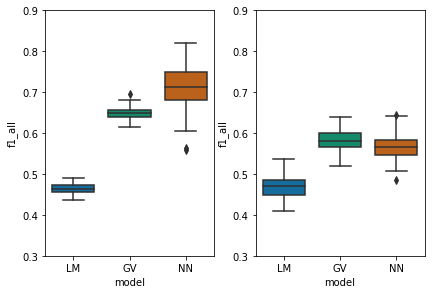

In [59]:
# f1-scores
trData = df[['trtest','f1_all','model']].loc[df['trtest'] == 'TR']
teData = df[['trtest','f1_all','model']].loc[df['trtest'] == 'TE']

fig, ax =plt.subplots(1,2)

plt.tight_layout()
#plt.title('Overall f1-scores for training and test sets', loc='right')
#sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
ax0 = sns.boxplot(y='f1_all', x='model',
                 data=trData, 
                 width=0.75,
                 palette="colorblind", ax=ax[0])
ax1 = sns.boxplot(y='f1_all', x='model', 
                 data=teData, 
                 width=0.75,
                 palette="colorblind", ax=ax[1])
ax1.set(ylim=(0.30, 0.90))
ax0.set(ylim=(0.30, 0.90))

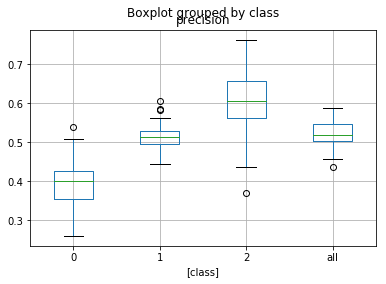

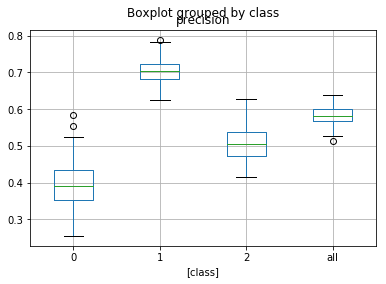

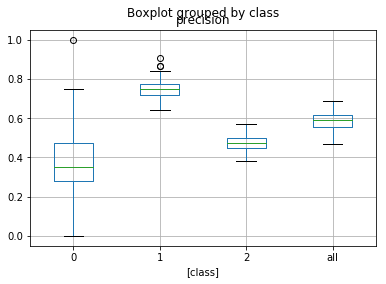

In [87]:
# Precision across classes and models
# Use test data only
df1 = df[['model','prec_0','prec_1','prec_2','prec_all']].loc[df['trtest'] == 'TE']
df1 = pd.melt(df1, id_vars=['model'], value_vars=['prec_0','prec_1','prec_2','prec_all'])
df1.columns = ['model', 'class','precision']
df1['class'].replace(['prec_0','prec_1','prec_2','prec_all'], ['0','1','2','all'], regex = False, inplace = True)
df1.loc[df1['model'] == 'LM'].boxplot(['precision'], by = ['class'])
df1.loc[df1['model'] == 'GV'].boxplot(['precision'], by = ['class'])
df1.loc[df1['model'] == 'NN'].boxplot(['precision'], by = ['class'])

In [88]:
# Precision
df1.groupby(['class','model'],sort=False).describe()

precision                                   
                count mean  std  min  25%  50%  75%  max
class model                                             
0     LM       100.00 0.40 0.05 0.26 0.36 0.40 0.43 0.54
      GV       100.00 0.39 0.07 0.25 0.35 0.39 0.43 0.58
      NN       100.00 0.36 0.19 0.00 0.28 0.35 0.47 1.00
1     LM       100.00 0.51 0.03 0.45 0.50 0.51 0.53 0.61
      GV       100.00 0.70 0.03 0.62 0.68 0.70 0.72 0.79
      NN       100.00 0.75 0.05 0.64 0.72 0.75 0.78 0.90
2     LM       100.00 0.61 0.07 0.37 0.56 0.61 0.66 0.76
      GV       100.00 0.51 0.05 0.41 0.47 0.50 0.54 0.63
      NN       100.00 0.47 0.04 0.38 0.45 0.47 0.50 0.57
all   LM       100.00 0.52 0.03 0.44 0.50 0.52 0.55 0.59
      GV       100.00 0.58 0.03 0.51 0.57 0.58 0.60 0.64
      NN       100.00 0.58 0.04 0.47 0.55 0.59 0.62 0.69

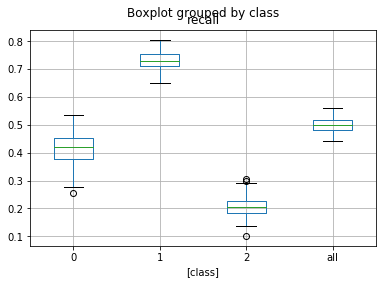

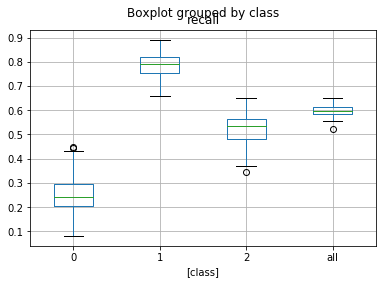

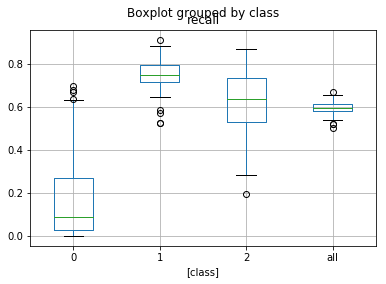

In [89]:
# Recall across classes and models
# Use test data only
df1 = df[['model','rec_0','rec_1','rec_2','rec_all']].loc[df['trtest'] == 'TE']
df1 = pd.melt(df1, id_vars=['model'], value_vars=['rec_0','rec_1','rec_2','rec_all'])
df1.columns = ['model', 'class','recall']
df1['class'].replace(['rec_0','rec_1','rec_2','rec_all'], ['0','1','2','all'], regex = False, inplace = True)
df1.loc[df1['model'] == 'LM'].boxplot(['recall'], by = ['class'])
df1.loc[df1['model'] == 'GV'].boxplot(['recall'], by = ['class'])
df1.loc[df1['model'] == 'NN'].boxplot(['recall'], by = ['class'])

In [63]:
# Recall across classes and models
df1.groupby(['class','model'],sort=False).describe()

recall                                   
             count mean  std  min  25%  50%  75%  max
class model                                          
0     LM    100.00 0.42 0.05 0.25 0.38 0.42 0.45 0.54
      GV    100.00 0.25 0.08 0.08 0.20 0.24 0.30 0.45
      NN    100.00 0.18 0.20 0.00 0.03 0.09 0.27 0.70
1     LM    100.00 0.73 0.03 0.65 0.71 0.73 0.76 0.81
      GV    100.00 0.79 0.05 0.66 0.75 0.79 0.82 0.89
      NN    100.00 0.75 0.07 0.52 0.72 0.75 0.79 0.91
2     LM    100.00 0.21 0.03 0.10 0.19 0.21 0.23 0.31
      GV    100.00 0.52 0.06 0.35 0.48 0.53 0.56 0.65
      NN    100.00 0.61 0.15 0.19 0.53 0.64 0.73 0.87
all   LM    100.00 0.50 0.03 0.44 0.48 0.50 0.52 0.56
      GV    100.00 0.60 0.02 0.52 0.58 0.60 0.61 0.65
      NN    100.00 0.59 0.03 0.50 0.58 0.60 0.61 0.67

In [80]:
df1 = df[['model','trtest','prec_all']]
df1.groupby(['model','trtest']).describe()

prec_all                                                    \
                count      mean       std       min       25%       50%   
model trtest                                                              
GV    TE         50.0  0.558490  0.019361  0.503684  0.546381  0.561435   
      TR         50.0  0.697474  0.025290  0.650133  0.679040  0.693119   
LM    TE         50.0  0.517999  0.012992  0.484731  0.510108  0.518318   
      TR         50.0  0.522673  0.029554  0.464879  0.498043  0.521971   
NN    TE         50.0  0.560798  0.038462  0.454993  0.541473  0.564083   
      TR         50.0  0.792329  0.061368  0.508615  0.764959  0.804713   

                                  
                   75%       max  
model trtest                      
GV    TE      0.569536  0.598584  
      TR      0.714305  0.751563  
LM    TE      0.528513  0.543418  
      TR      0.541887  0.591723  
NN    TE      0.578164  0.691040  
      TR      0.827957  0.866382

[(0.3, 0.9)]

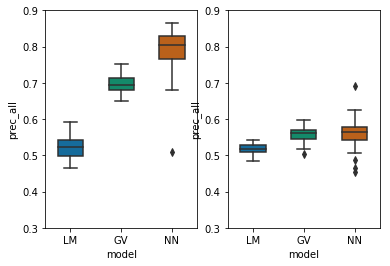

In [82]:
trData = df[['trtest','prec_all','model']].loc[df['trtest'] == 'TR']
teData = df[['trtest','prec_all','model']].loc[df['trtest'] == 'TE']

fig, ax =plt.subplots(1,2)
#plt.ylim=(0.30, 0.90)
ax0 = sns.boxplot(y='prec_all', x='model', 
                 data=trData, 
                 width=0.5,
                 palette="colorblind", ax=ax[0])
ax1 = sns.boxplot(y='prec_all', x='model', 
                 data=teData, 
                 width=0.5,
                 palette="colorblind", ax=ax[1])
ax1.set(ylim=(0.30, 0.90))
ax0.set(ylim=(0.30, 0.90))

[(0.3, 0.9)]

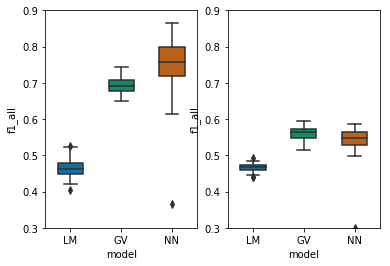

In [70]:
df1 = df[['model','trtest','f1_all']]
df1.groupby(['model','trtest']).describe()

[(0.3, 0.9)]

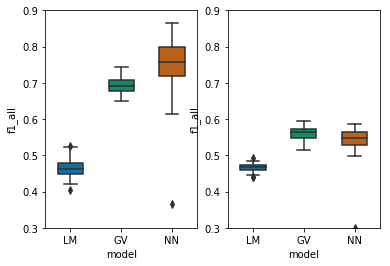

In [83]:
trData = df[['trtest','f1_all','model']].loc[df['trtest'] == 'TR']
teData = df[['trtest','f1_all','model']].loc[df['trtest'] == 'TE']

fig, ax =plt.subplots(1,2)
#plt.ylim=(0.30, 0.90)
ax0 = sns.boxplot(y='f1_all', x='model', 
                 data=trData, 
                 width=0.5,
                 palette="colorblind", ax=ax[0])
ax1 = sns.boxplot(y='f1_all', x='model', 
                 data=teData, 
                 width=0.5,
                 palette="colorblind", ax=ax[1])
ax1.set(ylim=(0.30, 0.90))
ax0.set(ylim=(0.30, 0.90))